In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import random



In [2]:
df_train = pd.read_csv("../input/data/train/train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [3]:
df_train.sample(5)

,id,gender,race,age,path
2365,006241,male,Asian,20,006241_male_Asian_20
490,001119,female,Asian,27,001119_female_Asian_27
2206,005500,female,Asian,49,005500_female_Asian_49
984,001775-1,female,Asian,50,001775-1_female_Asian_50
745,001482,female,Asian,60,001482_female_Asian_60


In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2700.0,37.708148,16.985904,18.0,20.0,36.0,55.0,60.0


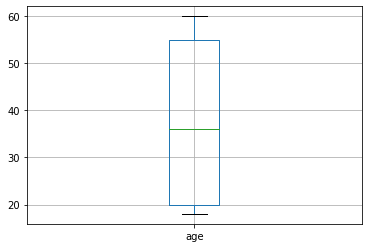

In [5]:
df_train.boxplot()

- 인종은 Asian만 있어 불필요한 컬럼

In [6]:
df_train['race'].unique()

array(['Asian'], dtype=object)

- 성별 간 차이는 있지만 유의미해보이지는 않음

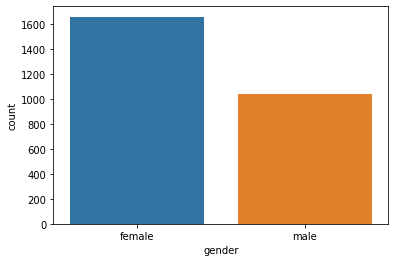

In [8]:
sns.countplot(x = df_train['gender'])

In [10]:
# 인당 마스크를 쓴 이미지 5개, 쓰지 않은 이미지 1개, 제대로 착용하지 않은 이미지 1개씩이 있다.
# os에 따라 불필요한 파일이 있다면 삭제
img_path = '../../input/data/train/images'
tmp = os.listdir(img_path + '/' + df_train["path"][0])
tmp

['incorrect_mask.jpg',
 'mask5.jpg',
 'mask2.jpg',
 'mask4.jpg',
 'mask1.jpg',
 'mask3.jpg',
 'normal.jpg']

In [12]:
# 불필요한 파일 삭제
# mac -> window로 파일을 옮기면 생기는 메타데이터로 지워도 무방하다고 한다.
rm = False;
if rm:
    for (path, dir, files) in os.walk(img_path):
        for filename in files:
            ext = os.path.splitext(filename)[0]
            if ext.startswith('._'):
                # print(os.path.join(path, filename))
                os.remove(os.path.join(path, filename))


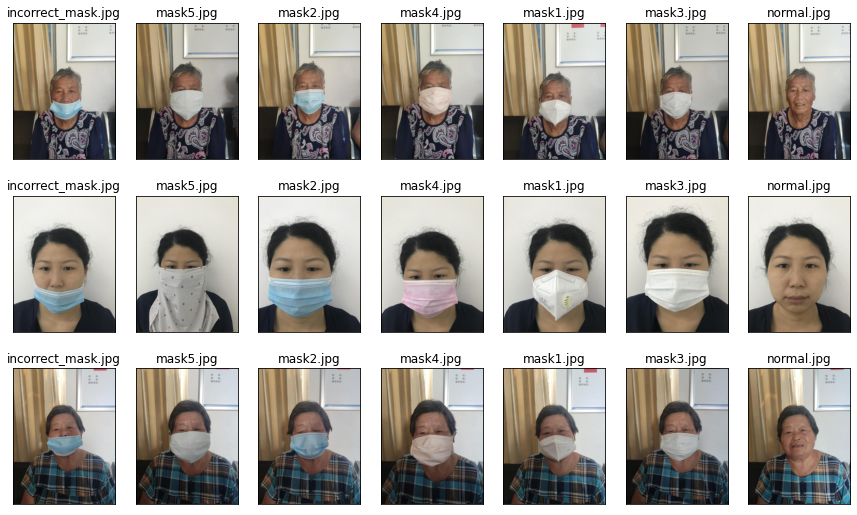

In [13]:
# c = 7로 고정
r, c = 3, 7
fig, axes = plt.subplots(r, c, figsize = (15,3*r))

for i in range(r):
    n = random.randint(0,len(df_train))
    for j in range(c):
        axes[i][j].set_title(tmp[j])
        tmp = os.listdir(img_path + '/' + df_train["path"][n])
        img = plt.imread(img_path + '/' + df_train["path"][n]+ '/'+tmp[j])
        axes[i][j].imshow(img)
        axes[i][j].set_xticks([]); axes[i][j].set_yticks([])

plt.show()

# 이미지를 직접 살펴본 결과
1. incorrect의 기준은 입과 코를 모두 잘 덮었는가 여부이다.
2. 배경은 단색, 야외, 글씨가 있는 배경 등 다양하다. (배경이 영향이 있을까?)
3. 1개의 마스크 종류를 사용한 사람도 있고, 여러 개 사용한 사람도 있다.
4. 구도는 거의 유사하지만 미세하게 다른 경우도 존재한다.
5. 같은 사람의 사진이라도 밝기 정도가 경우가 존재한다.

In [14]:
df_train.iloc[0]

id                        000001
gender                    female
race                       Asian
age                           45
path      000001_female_Asian_45
Name: 0, dtype: object

- 조정한 df_train_adj 생성

In [16]:
# id, age: 그대로 / race: 삭제
# gender: (M,F) = (0,1)
# path: 이미지별 path로 통합
# mask: (incorrect, correct, normal) = (0,1,2)
# extention: 확장자
img_path = '../../input/data/train/images'
id = []
gender = []
age = []
path = []
mask = []
extension = []

for i in range(len(df_train)):
    tmp = df_train.iloc[i]
    id_ = tmp['id']
    gender_ = int(tmp['gender']=='female')
    age_ = tmp['age']
    path1 =  tmp["path"]
    for j, path2 in enumerate(os.listdir(img_path + '/' + path1)):
        name, ext = path2.split('.')
        for k, x in enumerate(['incorrect','mask','normal']):
            if name.startswith(x):
                mask.append(k)
        extension.append(ext)
        path.append(path1 + '/' + path2)
        id.append(id_)
        gender.append(gender_)
        age.append(age_)



In [17]:
df_train_adj = pd.DataFrame(data = zip(id,path,extension,age,mask,gender), columns = ['id','path','extension','age','mask','gender'])

In [18]:
df_train_adj.sample(10)

,id,path,extension,age,mask,gender
3818,001177,001177_female_Asian_20/mask4.jpg,jpg,20,1,1
10321,003543,003543_male_Asian_55/mask4.jpg,jpg,55,1,0
17057,006405,006405_female_Asian_18/mask3.jpg,jpg,18,1,1
15476,005506,005506_male_Asian_25/normal.jpg,jpg,25,2,0
18495,006713,006713_male_Asian_19/mask5.jpg,jpg,19,1,0
140,000025,000025_female_Asian_49/incorrect_mask.jpg,jpg,49,0,1
7276,001892,001892_female_Asian_52/mask4.jpg,jpg,52,1,1
11253,003769,003769_female_Asian_60/mask1.jpg,jpg,60,1,1
15464,005504,005504_female_Asian_60/mask5.jpg,jpg,60,1,1
8446,003168,003168_female_Asian_20/mask1.jpg,jpg,20,1,1


- id가 겹치는 오류가 하나 있다. (상관 없음)

In [19]:
df_train_adj[df_train_adj['id']=='003397']

,id,path,extension,age,mask,gender
9562,003397,003397_female_Asian_20/incorrect_mask.jpg,jpg,20,0,1
9563,003397,003397_female_Asian_20/mask5.jpg,jpg,20,1,1
9564,003397,003397_female_Asian_20/mask2.jpg,jpg,20,1,1
9565,003397,003397_female_Asian_20/mask4.jpg,jpg,20,1,1
9566,003397,003397_female_Asian_20/mask1.jpg,jpg,20,1,1
9567,003397,003397_female_Asian_20/mask3.jpg,jpg,20,1,1
9568,003397,003397_female_Asian_20/normal.jpg,jpg,20,2,1
9569,003397,003397_female_Asian_19/incorrect_mask.jpg,jpg,19,0,1
9570,003397,003397_female_Asian_19/mask5.jpg,jpg,19,1,1
9571,003397,003397_female_Asian_19/mask2.jpg,jpg,19,1,1


In [20]:
df_train_adj['mask'].value_counts()

1    13500
2     2700
0     2700
Name: mask, dtype: int64

In [27]:
# 확장자가 (동일인에 대해서도) 일정하지 않은 경우가 존재한다.
df_train_adj['extension'].value_counts()

jpg     18035
png       511
jpeg      354
Name: extension, dtype: int64

- age 카테고리화

In [22]:
# (30세 미만, 30세 이상 60세 미만, 60세 이상) = (0,1,2)
df_train_adj['age_class'] = pd.cut(df_train_adj['age'], bins = [0,30,60,1000], right=False, labels = [0,1,2])

In [23]:
df_train_adj[df_train_adj['age']==60]

,id,path,extension,age,mask,gender,age_class
2912,001038,001038_male_Asian_60/incorrect_mask.jpg,jpg,60,0,0,2
2913,001038,001038_male_Asian_60/mask5.jpg,jpg,60,1,0,2
2914,001038,001038_male_Asian_60/mask2.jpg,jpg,60,1,0,2
2915,001038,001038_male_Asian_60/mask4.jpg,jpg,60,1,0,2
2916,001038,001038_male_Asian_60/mask1.jpg,jpg,60,1,0,2
...,...,...,...,...,...,...,...
15521,005515,005515_female_Asian_60/mask2.jpg,jpg,60,1,1,2
15522,005515,005515_female_Asian_60/mask4.jpg,jpg,60,1,1,2
15523,005515,005515_female_Asian_60/mask1.jpg,jpg,60,1,1,2
15524,005515,005515_female_Asian_60/mask3.jpg,jpg,60,1,1,2


<AxesSubplot:xlabel='age_class', ylabel='count'>

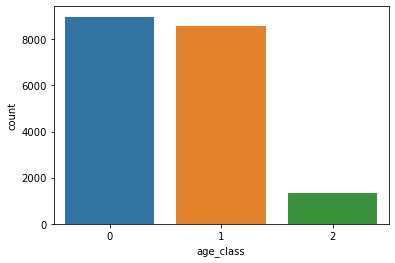

In [162]:
# 60세의 데이터가 많이 부족하다.
sns.countplot(x = df_train_adj['age_class'])

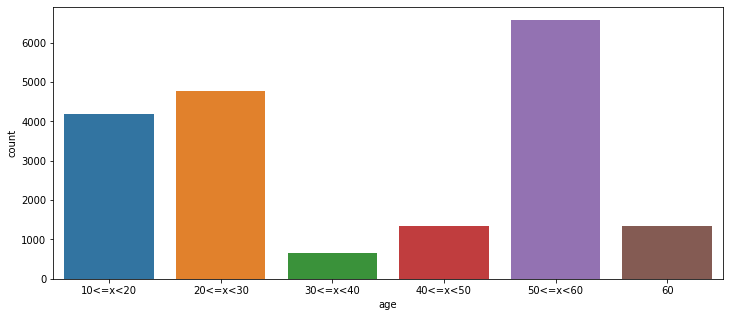

In [21]:
plt.figure(figsize = (12,5))
sns.countplot(x = pd.cut(df_train_adj['age'], bins = [10,20,30,40,50,60,1000], right=False, 
labels = ['10<=x<20','20<=x<30','30<=x<40','40<=x<50','50<=x<60','60']))

# 정답 레이블
![image](https://user-images.githubusercontent.com/85151359/154933965-46470529-1a76-44e3-aeeb-e77e35728d88.png)

In [24]:
# 정답 레이블(ans) 생성용 dict
dic_ans = dict()
keys = [(i,j,k) for i in [1,0,2] for j in range(2) for k in range(3)]
labels = range(18)
for x,y in zip(keys,labels):
    dic_ans[x]=y

In [25]:
# 정답 레이블 컬럼 추가
if 'ans' not in df_train_adj:
    df_train_adj['ans'] = [dic_ans[tuple(df_train_adj[['mask','gender','age_class']].iloc[i])] for i in range(len(df_train_adj))]

- 기본적으로 마스크 정상 착용(0~5)이 당연히 많고, 나이대의 불균형으로 인한 차이가 눈에 띈다.

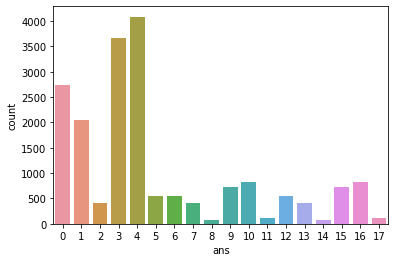

In [26]:
sns.countplot(x = df_train_adj['ans'])

# 정리하며 든 생각 / key-points
1. 나이의 불균형을 어떻게 해소할 것인가 -> label smoothing?
2. 확장자의 차이 영향은?
3. 사진 별로 밝기가 다른 경우가 존재함
4. 18개의 카테고리 한 번에 구분 vs 단계별 구분 vs (둘, 하나)로 묶기 ?
5. 얼굴을 검출 한 뒤 분류를 진행해야 할 듯
6. 데이터가 적다 -> Data augmentation이 중요
